**Instituto Tecnol√≥gico de Aeron√°utica ‚Äì ITA**

**Intelig√™ncia Artificial para Rob√≥tica M√≥vel ‚Äì CT-213**

**Professores:** 

Marcos Ricardo Omena de Albuquerque Maximo

Andr√© Oliveira Fran√ßani


# Laborat√≥rio 6 ‚Äì Redes Neurais

# 1. Introdu√ß√£o
Nesse laborat√≥rio, seu objetivo √© implementar uma rede neural de 3 camadas (1 camada de entrada, 1 camada escondida e 1 camada de sa√≠da) para realizar segmenta√ß√£o de cores para o futebol de rob√¥s. A Figura 1 ilustra esse processo, em que na Figura 1(a) tem-se a imagem original e na 1(b) a imagem ap√≥s a segmenta√ß√£o.

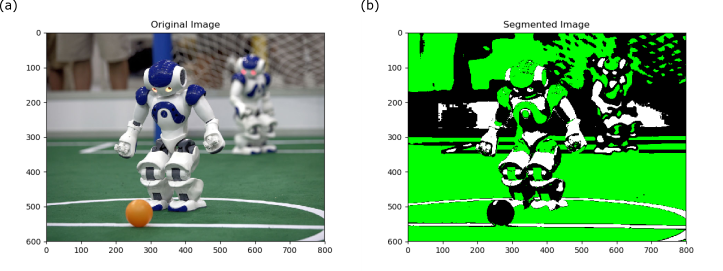

**Figura 1**: segmenta√ß√£o de cores.

# 2. Descri√ß√£o do Problema

O problema a ser resolvido √© a implementa√ß√£o de uma rede neural de tr√™s camadas para realizar a segmenta√ß√£o de cores para o futebol de rob√¥s. Para isso, ser√° necess√°rio configurar essa rede neural para realizar classifica√ß√£o multi-classe. Voc√™ deve implementar tanto o algoritmo de *Forward Propagation* (infer√™ncia) quanto o de *Back Propagation* (treinamento) para essa rede. Como trata-se de um problema de classifica√ß√£o de multi-classe, deve-se usar uma *loss function* de regress√£o log√≠stica multi-classe: 


$$L\left( y^{(i)}, \hat{y}^{(i)} \right)= - \sum_{c=1}^{C} \left [ \left(1 - y_c^{(i)} \right)\log{\left( 1- \hat{y}_c^{(i)}\right)} + y_c^{(i)}\log{\left( \hat{y}_c^{(i)} \right)} \right]$$


Como de costume, a fun√ß√£o de custo √© dada pela m√©dia dos *losse*s dos exemplos de treinamento:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} L \left( y^{(i)}, \hat{y}^{(i)}\right)$$

Considerando uma rede neural de 3 camadas (1 camada escondida) e com fun√ß√£o de ativa√ß√£o sigm√≥ide $\sigma(\cdot)$ em todos os neur√¥nios, chega-se √†s seguintes equa√ß√µes para o algoritmo de Back Propagation nessa rede: 

$$\frac{\partial L}{\partial w_{ck}^{[2]}} =  \delta_c^{[2]} a_k^{[1]} $$

$$\frac{\partial L}{\partial b_{c}^{[2]}} = \delta_c^{[2]}$$

$$\frac{\partial L}{\partial w_{kj}^{[1]}} = \delta_k^{[1]} a_j^{[0]} $$

$$\frac{\partial L}{\partial b_{k}^{[1]}} = \delta_k^{[1]}$$

em que:

$$\delta_c^{[2]} = (\hat{y}_c - y_c)$$

$$\delta_k^{[1]} = \sum_{c=1}^{C} w_{ck}^{[2]} \delta_c^{[2]} \sigma^{\prime}(z_k^{[1]})$$

A adapta√ß√£o dessas equa√ß√µes para vetoriza√ß√£o fica como exerc√≠cio. Perceba que essas equa√ß√µes s√£o muito semelhantes √†s mostradas nos slides, por√©m h√° algumas diferen√ßas, especialmente no c√°lculo do erro na √∫ltima camada, dado que se utiliza aqui *loss function* de regress√£o log√≠stica, ao inv√©s de erro quadr√°tico. Durante a implementa√ß√£o do algoritmo de *Back Propagation*, √© importante lembrar tamb√©m que a derivada da fun√ß√£o sigm√≥ide √© dada por: 

$$ \sigma^{\prime}(x) = \sigma(x)(1-\sigma(x))$$


Note ainda que o $L(y^{(i)}, \hat{y}^{(i)})$ se refere a apenas um exemplo de treinamento. Desse modo, lembrando que a rede neural deve ser atualizada com o gradiente de $J(\theta)$, voc√™ deve calcular as derivadas parciais de $L(y^{(i)}, \hat{y}^{(i)})$ para cada exemplo $ùëñ$ e tirar a m√©dia. Para simplificar, n√£o ser√° implementado nenhum mecanismo de regulariza√ß√£o na rede neural.

Para a segmenta√ß√£o de cores, para simplificar, usar-se-√° apenas duas classes de cores: verde e branco, que s√£o as cores mais abundantes no ambiente do futebol de rob√¥s. No *dataset*, h√° algumas outras cores (como o laranja da bola). Durante o treinamento da rede, essas outras cores ser√£o marcadas como sendo da classe 0 [0, 0], i.e. como se representassem uma classe de cor indefinida. Ent√£o, na segmenta√ß√£o final, as cores indefinidas s√£o mostradas como preto. Tamb√©m, por simplicidade, o *dataset* est√° usando espa√ßo de cor RGB.

No *dataset* de cores fornecido, h√° 78990 exemplos. Como realizar um passo do *Back Propagation* num *dataset* t√£o grande seria muito lento, utiliza-se o conceito de *mini-batch*, logo a rede √© treinada com Descida de Gradiente Estoc√°stica. O *mini-batch* usado consiste de 100 exemplos aleat√≥rios de treinamento de cada classe (incluindo a classe de cor indefinida). No caso do *dataset* considerado, h√° muito mais pixels verdes do que de outras cores, pois o campo do futebol de rob√¥s √© verde. Com isso, se o *batch* de treinamento mantivesse a mesma distribui√ß√£o de cores que o *dataset* original, a rede daria prefer√™ncia para aprender o verde em detrimento das demais cores. Esse problema de desbalanceamento de exemplos de treinamento
√© comum em redes neurais. Finalmente, destaca-se que se aplica normaliza√ß√£o nos valores de entrada para facilitar o treinamento: normalmente, os valores de cada canal de cor RGB est√° na faixa 0-255. Como esses s√£o valores altos, de modo que fica ruim para uma rede com fun√ß√£o de ativa√ß√£o sigm√≥ide, usou-se como dados de entrada para a rede os valores $\frac{R}{255}$, $\frac{G}{255}$ e $\frac{B}{255}$.

# 3.	C√≥digo Base

O c√≥digo base j√° implementa o teste da rede neural e o treinamento e teste da segmenta√ß√£o de cores. Segue uma breve descri√ß√£o das c√©lulas fornecidas:

- **Implementa√ß√£o da Rede Neural**: na classe ``NeuralNetwork``, voc√™ deve implementar os m√©todos ``forward_propagation()``, ``compute_gradient_back_propagation()`` e ``back_propagation()``. 

- Arquivo ``utils.py``: fun√ß√µes utilit√°rias.

- **Teste da Rede Neural**: testa a implementa√ß√£o da rede neural com algumas fun√ß√µes de classifica√ß√£o simples (com uma classe):

  - ``sum_gt_zero()``: fun√ß√£o que classifica se a soma das duas entradas √© maior que zero.

  - ``xor()``: fun√ß√£o inspirada na opera√ß√£o de ou exclusivo que classifica se as duas entradas tem o mesmo sinal.
  
- test_color_segmentation.py: realiza o aprendizado da segmenta√ß√£o de cores e exibe o resultado.

Destaca-se que os treinamentos das redes neurais podem demorar alguns minutos. Os hiperpar√¢metros definidos em cada *script* j√° foram ajustados pelo professor para o problema, mas fique √† vontade para alter√°-los caso sinta necessidade.


# 4. Tarefas

Comece rodando a c√©lula abaixo para fazer o *download* das imagens do laborat√≥rio e do arquivo utils.py com fun√ß√µes utilit√°rias.

In [1]:
import zipfile
import os

# download data (MUST RUN)
!gdown --id 1p1fGckaKDdtbauesDmqhi2HtXuUNu_8g

with zipfile.ZipFile("lab6_ct213_2022.zip","r") as zip_ref:
  zip_ref.extractall() # extracts in current directory

# make results folder to save images
if not os.path.exists('results'):
  os.makedirs('results')
  
os.remove("lab6_ct213_2022.zip")

C:\Users\UlissesLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p1fGckaKDdtbauesDmqhi2HtXuUNu_8g
To: c:\Users\UlissesLS\OneDrive - ga.ita.br\ITA\7¬∫ Semestre\2.CT-213 - Intelig√™ncia Artificial para Rob√≥tica M√≥vel\Laborat√≥rios\Lab 06\lab6_ct213_2022.zip

  0%|          | 0.00/228k [00:00<?, ?B/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 228k/228k [00:00<00:00, 1.28MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 228k/228k [00:00<00:00, 1.28MB/s]


## 4.1. Implementa√ß√£o da Rede Neural

Sua primeira tarefa consiste em implementar as opera√ß√µes de *Forward Propagation* e *Back Propagation* da rede neural. O *Forward Propagation* da rede em quest√£o segue as mesmas equa√ß√µes mostradas nos *slides*. J√° o *Back Propagation* segue as equa√ß√µes mostradas na Se√ß√£o 2, que s√£o diferentes das mostradas nos *slides*, por conta de estarmos usando uma fun√ß√£o de custo diferente aqui.

N√£o h√° necessidade de implementar as opera√ß√µes da rede neural da forma mais eficiente poss√≠vel (a n√£o ser que os treinamentos estejam demorando excessivamente nos seus testes). Caso sua implementa√ß√£o tenha ficado proibitivamente lenta, a ponto de n√£o conseguir realizar as tarefas propostas, fique √† vontade para conversar com o professor. Al√©m disso, sua implementa√ß√£o pode se aproveitar fortemente das restri√ß√µes impostas na rede: tr√™s camadas e fun√ß√µes de ativa√ß√£o sigm√≥ide em todos os neur√¥nios.


**Observa√ß√£o**: na nota√ß√£o usada nos *slides*, a camada $ùëô = 0$ da rede neural √© a camada de entrada, de modo que n√£o h√° pesos nem *biases* associados a ela. Desse modo, para que a nota√ß√£o no c√≥digo fique igual √† dos *slides*, define-se uma posi√ß√£o 0 com ``None`` nas listas que definem as matrizes de peso e os vetores de *biases*. Verifique como as vari√°veis *weights* e *biases* s√£o inicializadas no c√≥digo para entender melhor essa observa√ß√£o.

In [11]:
import numpy as np
from utils import sigmoid, sigmoid_derivative


class NeuralNetwork:
    """
    Represents a two-layers Neural Network (NN) for multi-class classification.
    The sigmoid activation function is used for all neurons.
    """
    def __init__(self, num_inputs, num_hiddens, num_outputs, alpha):
        """
        Constructs a three-layers Neural Network.

        :param num_inputs: number of inputs of the NN.
        :type num_inputs: int.
        :param num_hiddens: number of neurons in the hidden layer.
        :type num_hiddens: int.
        :param num_outputs: number of outputs of the NN.
        :type num_outputs: int.
        :param alpha: learning rate.
        :type alpha: float.
        """
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.num_outputs = num_outputs
        self.alpha = alpha
        self.weights = [None] * 3
        self.biases = [None] * 3
        self.weights[1] = 0.001 * np.random.randn(num_hiddens, num_inputs)
        self.weights[2] = 0.001 * np.random.randn(num_outputs, num_hiddens)
        self.biases[1] = np.zeros((num_hiddens, 1))
        self.biases[2] = np.zeros((num_outputs, 1))

    def forward_propagation(self, inputs):
        """
        Executes forward propagation.
        Notice that the z and a of the first layer (l = 0) are equal to the NN's input.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :return z: values computed by applying weights and biases at each layer of the NN.
        :rtype z: 3-dimensional list of (num_neurons[l], num_samples) numpy matrices.
        :return a: activations computed by applying the activation function to z at each layer.
        :rtype a: 3-dimensional list of (num_neurons[l], num_samples) numpy matrices.
        """
        
        # Creating lists to store the values of z and a
        z = [None] * 3
        a = [None] * 3
        
        # Input layer (l = 0)
        z[0] = inputs
        a[0] = inputs
        
        # Hidden layer(l = 1)
        z[1] = np.dot(self.weights[1], a[0]) + self.biases[1]
        a[1] = sigmoid(z[1])
        
        # Output  (l = 2)
        z[2] = np.dot(self.weights[2], a[1]) + self.biases[2]
        a[2] = sigmoid(z[2])
        
        return z, a

    def compute_cost(self, inputs, expected_outputs):
        """
        Computes the logistic regression cost of this network.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :param expected_outputs: expected outputs of the network.
        :type expected_outputs: list of numpy matrices.
        :return: logistic regression cost.
        :rtype: float.
        """
        z, a = self.forward_propagation(inputs)
        y = expected_outputs
        y_hat = a[-1]
        cost = np.mean(-(y * np.log(y_hat) + (1.0 - y) * np.log(1.0 - y_hat)))
        return cost

    def compute_gradient_back_propagation(self, inputs, expected_outputs):
        """
        Computes the gradient with respect to the NN's parameters using back propagation.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :param expected_outputs: expected outputs of the network.
        :type expected_outputs: (num_outputs, num_samples) numpy array.
        :return weights_gradient: gradients of the weights at each layer.
        :rtype weights_gradient: 3-dimensional list of numpy arrays.
        :return biases_gradient: gradients of the biases at each layer.
        :rtype biases_gradient: 3-dimensional list of numpy arrays.
        """
        weights_gradient = [None] * 3
        biases_gradient = [None] * 3

        # Add logic to compute the gradients
        
        # Catching the main parameters:
        z, a = self.forward_propagation(inputs)
        
        delta = [None] * 3
        
        y = expected_outputs
        
        # Number of samples
        m = inputs.shape[1]
        
        # delta expressions
        delta[2] = a[2] - y
        delta[1] = np.dot(self.weights[2].T, delta[2]) * sigmoid_derivative(z[1])
        
        
        # Output layer (l = 2)
        weights_gradient[2] = (1 / m) * (np.dot(delta[2], a[1].T))
        biases_gradient[2] = (1 / m) * (np.sum(delta[2], axis = 1, keepdims=True))
        
        # Hidden layer (l = 1)
        weights_gradient[1] = (1 / m) * (np.dot(delta[1], a[0].T))
        biases_gradient[1] = (1 / m) * (np.sum(delta[1], axis = 1, keepdims=True))


        return weights_gradient, biases_gradient

    def back_propagation(self, inputs, expected_outputs):
        """
        Executes the back propagation algorithm to update the NN's parameters.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :param expected_outputs: expected outputs of the network.
        :type expected_outputs: (num_outputs, num_samples) numpy array.
        """
        weights_gradient, biases_gradient = self.compute_gradient_back_propagation(inputs, expected_outputs)
        
        # Add logic to update the weights and biases
        layers = 3
        for l in range(layers):
            # We cannot iterate over a None element
            if l == 0:
                continue
            else:
                self.weights[l] = self.weights[l] - self.alpha * weights_gradient[l]
                self.biases[l] = self.biases[l] - self.alpha * biases_gradient[l]
        

## 4.2 Teste da Rede Neural

Ap√≥s a implementa√ß√£o da rede, utilize a c√©lula abaixo para test√°-la. Teste primeiramente com a fun√ß√£o de classifica√ß√£o ``sum_gt_zero()`` e posteriormente com a ``xor()``. Para alterar a fun√ß√£o utilizada, basta alterar a vari√°vel *classification_function*. Em ambos os casos, usa-se 10 neur√¥nios na camada escondida e taxa de aprendizado de 6. Adicione todos os gr√°ficos auto-gerados no seu relat√≥rio e os discuta.

epoch: 1; cost: 0.713217
epoch: 2; cost: 1.025937
epoch: 3; cost: 2.659219
epoch: 4; cost: 1.483262
epoch: 5; cost: 1.370024
epoch: 6; cost: 0.959771
epoch: 7; cost: 0.931880
epoch: 8; cost: 0.852704
epoch: 9; cost: 0.832057
epoch: 10; cost: 0.793588
epoch: 11; cost: 0.780559
epoch: 12; cost: 0.759319
epoch: 13; cost: 0.750729
epoch: 14; cost: 0.737967
epoch: 15; cost: 0.732086
epoch: 16; cost: 0.723995
epoch: 17; cost: 0.719866
epoch: 18; cost: 0.714551
epoch: 19; cost: 0.711606
epoch: 20; cost: 0.708025
epoch: 21; cost: 0.705903
epoch: 22; cost: 0.703448
epoch: 23; cost: 0.701909
epoch: 24; cost: 0.700203
epoch: 25; cost: 0.699083
epoch: 26; cost: 0.697886
epoch: 27; cost: 0.697068
epoch: 28; cost: 0.696222
epoch: 29; cost: 0.695625
epoch: 30; cost: 0.695023
epoch: 31; cost: 0.694586
epoch: 32; cost: 0.694156
epoch: 33; cost: 0.693836
epoch: 34; cost: 0.693528
epoch: 35; cost: 0.693294
epoch: 36; cost: 0.693072
epoch: 37; cost: 0.692900
epoch: 38; cost: 0.692740
epoch: 39; cost: 0.69

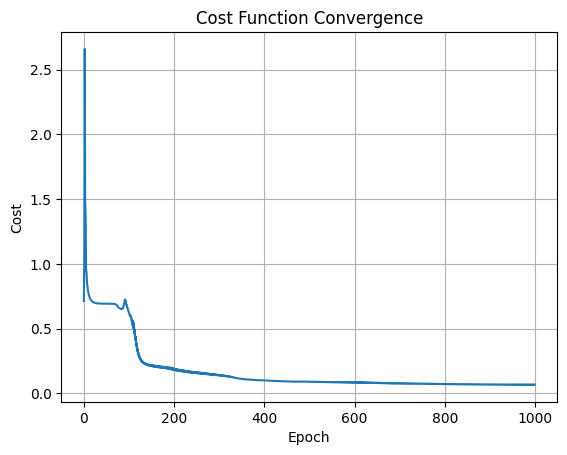

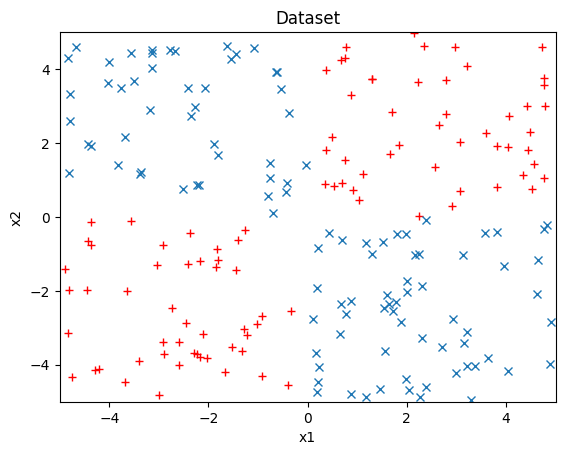

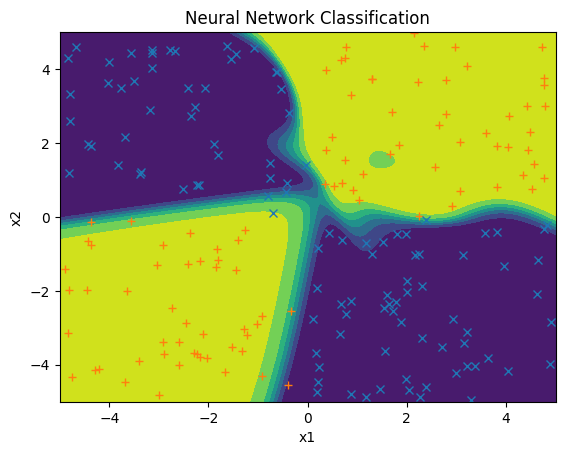

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import sum_gt_zero, xor


num_cases = 200  # number of auto-generated cases
num_epochs = 1000  # number of epochs for training
classification_function = sum_gt_zero  # selects sum_gt_zero as the classification function
# classification_function = xor  # selects xor as the classification function

# Figure format used for saving figures
fig_format = 'png'  # for Word users
# fig_format = 'svg'
# fig_format = 'eps'  # for LaTeX users

# Setting the random seed of numpy's random library for reproducibility reasons
np.random.seed(0)

# Creating the dataset
inputs = 5.0 * (-1.0 + 2.0 * np.random.rand(num_cases, 2))
expected_outputs = np.array([classification_function(x) for x in inputs])

# Separating the dataset into positive and negative samples
positives_indices = np.where(expected_outputs >= 0.5)
negatives_indices = np.where(expected_outputs < 0.5)
positives = inputs[positives_indices]
negatives = inputs[negatives_indices]

# Creating and training the neural network
neural_network = NeuralNetwork(2, 10, 1, 6.0)
costs = np.zeros(num_epochs)
inputs_nn = inputs.T
for i in range(num_epochs):
    neural_network.back_propagation(inputs_nn, expected_outputs)
    costs[i] = neural_network.compute_cost(inputs_nn, expected_outputs)
    print('epoch: %d; cost: %f' % (i + 1, costs[i]))

# Plotting cost function convergence
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid()
plt.savefig('results/cost_function_convergence_{}.{}'.format(classification_function.__name__, fig_format), format=fig_format)

# Plotting positive and negative samples
plt.figure()
plt.plot(positives[:, 0], positives[:, 1], '+r')
plt.plot(negatives[:, 0], negatives[:, 1], 'x')
plt.xlim([-5.0, 5.0])
plt.ylim([-5.0, 5.0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
plt.savefig('results/dataset_{}.{}'.format(classification_function.__name__, fig_format), format=fig_format)

# Plotting the decision regions of the neural network
plt.figure()
x = np.arange(-5.0, 5.05, 0.05)
y = np.arange(-5.0, 5.05, 0.05)
xx, yy = np.meshgrid(x, y)
inputs_region = np.array([xx.flatten(), yy.flatten()])
_, a = neural_network.forward_propagation(inputs_region)
z = a[-1].reshape(len(x), len(y))
plt.contourf(x, y, z)
plt.xlim([-5.0, 5.0])
plt.ylim([-5.0, 5.0])
plt.plot(positives[:, 0], positives[:, 1], '+', color='tab:orange')
plt.plot(negatives[:, 0], negatives[:, 1], 'x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Neural Network Classification')
plt.savefig('results/neural_net_classification_{}.{}'.format(classification_function.__name__, fig_format), format=fig_format)

## 4.3.	Segmenta√ß√£o de Cores

Para realizar o aprendizado e teste da segmenta√ß√£o de cores, rode a c√©lula implementada abaixo. Para essa rede, usou-se 20 neur√¥nios na camada escondida e taxa de aprendizado 6. Coloque em seu relat√≥rio as figuras geradas e discuta os resultados obtidos.


Training the neural network...
iteration: 1; cost: 1.998368
iteration: 2; cost: 2.495724
iteration: 3; cost: 1.265050
iteration: 4; cost: 0.667940
iteration: 5; cost: 0.585907
iteration: 6; cost: 0.569776
iteration: 7; cost: 0.555095
iteration: 8; cost: 0.540376
iteration: 9; cost: 0.523267
iteration: 10; cost: 0.507042
iteration: 11; cost: 0.490138
iteration: 12; cost: 0.475078
iteration: 13; cost: 0.458371
iteration: 14; cost: 0.440021
iteration: 15; cost: 0.422354
iteration: 16; cost: 0.407762
iteration: 17; cost: 0.389308
iteration: 18; cost: 0.371057
iteration: 19; cost: 0.360513
iteration: 20; cost: 0.341708
iteration: 21; cost: 0.331736
iteration: 22; cost: 0.318640
iteration: 23; cost: 0.304116
iteration: 24; cost: 0.301402
iteration: 25; cost: 0.290701
iteration: 26; cost: 0.284240
iteration: 27; cost: 0.288296
iteration: 28; cost: 0.327832
iteration: 29; cost: 0.362127
iteration: 30; cost: 0.456603
iteration: 31; cost: 0.387683
iteration: 32; cost: 0.496132
iteration: 33; cos

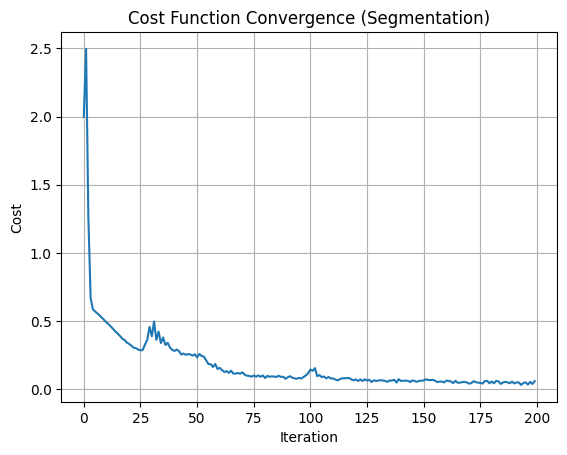

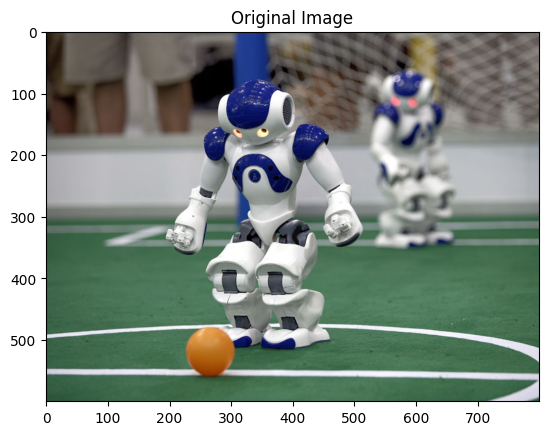

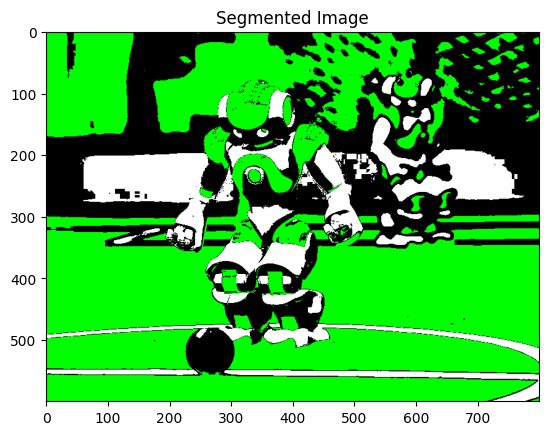

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.image import imread

threshold = 0.5  # threshold used for discretizing the output
num_iterations = 200  # number of epochs for training
mini_batch_samples_per_class = 100  # number of samples per class used in the mini-batch

# Figure format used for saving figures
fig_format = 'png'  # for Word users
# fig_format = 'svg'
# fig_format = 'eps'  # for LaTeX users


def encode_class(c):
    """
    Transforms a class representation as a number into an array of 0's and 1's.
    1 -> [1 0]; 2 -> [0 1]; otherwise -> [0 0].

    :param c: class as a number.
    :type c: int.
    :return: class as an array of 0's and 1's.
    :rtype: numpy matrix.
    """
    if c == 1:
        return np.array([1, 0])
    elif c == 2:
        return np.array([0, 1])
    else:
        return np.array([0, 0])


def decode_class(c):
    """
    Transforms a class representation as an array of 0's and 1's into a number.

    :param c: class as an array of 0's and 1's.
    :type c: numpy matrix.
    :return: class as a number.
    :rtype: int.
    """
    index = np.argmax(c)
    if c[index] < threshold:
        return 0
    return index + 1


# Loading the image
image = imread('nao1.jpg')

# Setting the random seed of numpy's random library for reproducibility reasons
np.random.seed(0)

# Loading the dataset
data = np.loadtxt('nao1.txt')
num_cases = data.shape[0]

# 70 percent of the samples of each class are selected randomly for making the training set.
# Then, the remaining samples are used for the test set.
greens = []
whites = []
others = []
for i in range(num_cases):
    c = data[i, 3]
    if abs(c - 1) < 1.0e-3:  # if the pixel is in class 1
        greens.append(i)
    elif abs(c - 2) < 1.0e-3:  # if the pixel is in class 2
        whites.append(i)
    else:  # if the pixel isn't in class 1 or 2, then we say its class is undefined (class 0)
        others.append(i)
num_greens = len(greens)
num_whites = len(whites)
num_others = len(others)
num_greens_training = math.floor(0.7 * num_greens)
num_whites_training = math.floor(0.7 * num_whites)
num_others_training = math.floor(0.7 * num_others)
np.random.shuffle(greens)
np.random.shuffle(whites)
np.random.shuffle(others)
greens_training = greens[0:num_greens_training]
whites_training = whites[0:num_whites_training]
others_training = others[0:num_others_training]
greens_test = greens[num_greens_training:-1]
whites_test = greens[num_whites_training:-1]
others_test = greens[num_others_training:-1]
test_set = greens_test + whites_test + others_test

# Training the neural network
print('Training the neural network...')
neural_network = NeuralNetwork(3, 20, 2, 6.0)
costs = np.zeros(num_iterations)
for i in range(num_iterations):
    np.random.shuffle(greens_training)
    np.random.shuffle(whites_training)
    np.random.shuffle(others_training)
    mini_batch = greens_training[0:mini_batch_samples_per_class] + whites_training[0:mini_batch_samples_per_class] + \
                   others_training[0:mini_batch_samples_per_class]
    inputs = (1.0 / 255.0) * data[mini_batch, 0:3].T
    expected_outputs = np.array([encode_class(x) for x in data[mini_batch, 3]]).T
    neural_network.back_propagation(inputs, expected_outputs)
    costs[i] = neural_network.compute_cost(inputs, expected_outputs)
    print('iteration: %d; cost: %f' % (i + 1, costs[i]))

# Plotting cost function convergence
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence (Segmentation)')
plt.grid()
plt.savefig('results/cost_function_convergence_segmentation.{}'.format(fig_format), format=fig_format)

# Evaluating the neural network on the test set
print('Evaluating the neural network on the test set...')
inputs_test = (1.0 / 255.0) * np.array(data[test_set, 0:3]).T
expected_outputs_test = np.array([encode_class(x) for x in data[test_set, 3]]).T
cost_test = neural_network.compute_cost(inputs_test, expected_outputs_test)
print('Cost on the test set: %f' % cost_test)

# Segmenting an actual image
height = image.shape[0]
width = image.shape[1]
num_channels = image.shape[2]

colors = [(0, 0, 0), (0, 255, 0), (255, 255, 255)]
print('Segmenting image...')
_, a = neural_network.forward_propagation((1.0 / 255.0) * image.reshape(image.shape[0] * image.shape[1], image.shape[2]).T)
c = np.array([colors[decode_class(y)] for y in a[-1].T])
segmented_image = c.reshape(height, width, num_channels)

plt.figure()
plt.imshow(image)
plt.title('Original Image')
plt.savefig('results/original_image.{}'.format(fig_format), format=fig_format)
plt.figure()
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.savefig('results/segmented_image.{}'.format(fig_format), format=fig_format)

# 5. Entrega

A entrega consiste do notebook no formato **.ipynb** e de um relat√≥rio, submetida atrav√©s do Google Classroom. Modifica√ß√µes nos arquivos do c√≥digo base s√£o permitidas, desde que o nome e a interface dos scripts ‚Äúmain‚Äù n√£o sejam alterados. A princ√≠pio, n√£o h√° limita√ß√£o de n√∫mero de p√°ginas para o relat√≥rio, mas pede-se que seja sucinto. O relat√≥rio deve conter:

- Breve descri√ß√£o em alto n√≠vel da sua implementa√ß√£o.
- Figuras que comprovem o funcionamento do seu c√≥digo.

Por limita√ß√µes do Google Classroom (e por motivo de facilitar a automatiza√ß√£o da corre√ß√£o), entregue seu laborat√≥rio com todos os arquivos num √∫nico arquivo **.zip** (**n√£o** utilize outras tecnologias de compacta√ß√£o de arquivos) com o seguinte padr√£o de nome: **‚Äú<login_email_google_education>_labX.zip‚Äù**. Por exemplo, no meu caso, meu login Google Education √© **marcos.maximo**, logo eu entregaria o lab 6 como **‚Äúmarcos.maximo_lab6.zip‚Äù**. **N√£o** crie subpastas para os arquivos da sua entrega, **deixe todos os arquivos na ‚Äúraiz‚Äù do .zip**. Os relat√≥rios devem ser entregues em formato **.pdf**.

# 6.	Dicas

- N√£o √© obrigat√≥rio implementar a rede neural com vetoriza√ß√£o, mas √© altamente recomendado. A diferen√ßa de desempenho √© significativa: com implementa√ß√£o completamente vetorizada, a sua rede deve treinar praticamente instantaneamente. Uma vetoriza√ß√£o ‚Äúparcial‚Äù tamb√©m √© poss√≠vel, caso ache mais f√°cil.

- Observa√ß√£o: quando fala-se *array* em NumPy, este *array* pode ser N-dimensional.

- Perceba que as matrizes *inputs* e *expected_outputs* possuem dimens√µes (*num_inputs*, *num_samples*) e (*num_outputs*, *num_samples*), respectivamente. Isso √© diferente do que vem sendo praticado nas *frameworks* de redes neurais, mas mantive assim para ficar coerente com a nota√ß√£o dos slides.

- Em ``utils.py``, h√° uma fun√ß√£o ``sigmoid_derivative()``, que calcula a derivada da fun√ß√£o sigm√≥ide (funciona para array).

- As implementa√ß√µes parciais nos m√©todos na classe ``NeuralNetwork`` s√£o apenas para guiar a implementa√ß√£o do aluno. Fique √† vontade para mud√°-las, desde que a interface de c√≥digo n√£o seja quebrada.

- Para um array do NumPy, o operador de multiplica√ß√£o de matriz elemento a elemento (*element-wise*) √© *, enquanto a multiplica√ß√£o usual de matriz usa o operador @.

- Diferentemente de como √© feito nos slides, voc√™ n√£o precisa repetir o vetor de *biases* para calcular o vetor $z^{[l]}$ de forma vetorizada. Basta somar o vetor de *biases* com a matriz resultante do produto dos pesos com o vetor de ativa√ß√µes da camada anterior que o NumPy se encarrega de fazer a opera√ß√£o corretamente. Para entender melhor, veja: https://numpy.org/doc/stable/user/basics.broadcasting.html 
	
- A fun√ß√£o ``np.mean(x)`` calcula a m√©dia de todos os elementos do array x. Caso queira fazer a m√©dia em apenas uma dire√ß√£o, usar ``np.mean(x, axis=dim)``, em que dim √© o √≠ndice da dimens√£o.

- Para aplicar o logaritmo neperiano em toda um array x, use ``np.log(x)``.
	
- Caso voc√™ tenha algum problema em *runtime* durante o c√°lculo do log na fun√ß√£o de custo, o motivo provavelmente √© algum *bug* no seu c√≥digo. Evite ficar tentando fazer ‚Äúgambiarras‚Äù na fun√ß√£o de custo para desaparecer com esse problema, provavelmente s√≥ v√£o mascarar algum *bug*.
	
- No c√°lculo dos gradientes, n√£o esque√ßa de dividir pelo n√∫mero de exemplos!
	
- Os tamanhos das dimens√µes de um array N-dimensional podem ser obtidos com ``array.shape``.
	
- Em uma situa√ß√£o, eu necessitei transformar um array unidimensional de n elementos em uma matriz bidimensional com $n \times 1$ elementos (i.e. vetor da MAT). Um jeito f√°cil de fazer isso √© usar:
``x = x.reshape((x.shape[0], 1))``.

- Para fazer o download das figuras e us√°-las no relat√≥rio, use os seguintes comandos:
```python
from google.colab import files
import os
os.system('zip -r lab6_results.zip results')
files.download("lab6_results.zip")
```

